# Applying a Random Forest model for regression

In [1]:
from tqdm import tqdm

import pandas as pd
import matplotlib.pyplot as plt

from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split

from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error, PredictionErrorDisplay

## Reading data

In [2]:
DATA = pd.read_csv("LogFinalData.csv", index_col="Unnamed: 0")
DATA

,racePctAsian,blackPerCap,indianPerCap,PctEmplProfServ,PctKids2Par,PctWorkMomYoungKids,NumImmig,PctImmigRec10,PctPersOwnOccup,PctVacMore6Mos,OwnOccMedVal,RentLowQ,RentHighQ,MedOwnCostPctIncNoMtg,PctForeignBorn,PctSameCity85,PctUsePubTrans,ViolentCrimesPerPop
0,0.049218,0.120574,0.103804,0.149219,0.201397,0.240549,0.012837,0.143015,0.190332,0.100371,0.075547,0.133539,0.139879,0.096910,0.049218,0.178977,0.079181,0.079181
1,0.161368,0.123852,0.064458,0.060698,0.167317,0.164353,0.004321,0.212188,0.100371,0.096910,0.079181,0.152288,0.146128,0.071882,0.082785,0.204120,0.161368,0.222716
2,0.068186,0.103804,0.029384,0.110590,0.158362,0.232996,0.000000,0.075547,0.152288,0.113943,0.068186,0.103804,0.103804,0.107210,0.056905,0.222716,0.008600,0.155336
3,0.049218,0.143015,0.064458,0.161368,0.187521,0.267172,0.008600,0.117271,0.287802,0.167317,0.082785,0.243038,0.247973,0.167317,0.075547,0.214844,0.107210,0.049218
4,0.037426,0.107210,0.000000,0.139879,0.281033,0.146128,0.000000,0.103804,0.276462,0.190332,0.117271,0.146128,0.139879,0.082785,0.045323,0.206826,0.008600,0.012837
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1989,0.049218,0.103804,0.000000,0.225309,0.225309,0.250420,0.004321,0.167317,0.190332,0.082785,0.086360,0.161368,0.149219,0.143015,0.086360,0.170262,0.021189,0.037426
1990,0.262451,0.100371,0.071882,0.149219,0.212188,0.120574,0.021189,0.222716,0.049218,0.053078,0.136721,0.187521,0.206826,0.117271,0.184691,0.041393,0.079181,0.161368
1991,0.017033,0.096910,0.075547,0.146128,0.152288,0.139879,0.025306,0.100371,0.139879,0.161368,0.120574,0.107210,0.143015,0.184691,0.096910,0.252853,0.071882,0.089905
1992,0.086360,0.110590,0.079181,0.195900,0.217484,0.195900,0.025306,0.173186,0.143015,0.127105,0.173186,0.198657,0.243038,0.146128,0.161368,0.201397,0.123852,0.075547


## Creating test and train sets for model fitting

In [3]:
X = DATA.loc[:, DATA.columns[:-2]]
Y = DATA.loc[:, DATA.columns[-1]]

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=21)
X_train.size, X_test.size

(25520, 6384)

## Defining the optimum Random Forest Regressor
The optimization will be made by changing the number of samples per Split and Leaf, the max number of levels for
the depth for the trees of the Forest and the number of Decision Trees

In [4]:
Results_Nums_SplitLeaf = []
MinR2 = 0.0
Range_Leaf_Split = range(1, 21)
Range_Estimators = range(10, 101, 5)

ProgressBar = tqdm(total = (len(Range_Leaf_Split)**2)*len(Range_Estimators))

for NumEstim in Range_Estimators:
    for numSplit in Range_Leaf_Split:
        for numLeaf in Range_Leaf_Split:
            RF_Regressor = RandomForestRegressor(n_estimators=NumEstim, min_samples_split=numSplit,
                                                     min_samples_leaf=numLeaf, random_state = 42, n_jobs = -1)
            RF_Regressor.fit(X_train, Y_train)
            Y_hat = RF_Regressor.predict(X_test)
            R2_Score = r2_score(Y_test, Y_hat)

            ProgressBar.update(1)            
            if R2_Score > MinR2:
                MinR2 = R2_Score
                MinSampleSplit = numSplit
                MinSampleLeaf = numLeaf
                MinEstim = NumEstim

print(f"{MinEstim=}")
print(f"{MinSampleLeaf=}")
print(f"{MinSampleSplit=}")
print(f"{MinR2=}")

100%|██████████| 7600/7600 [37:42<00:00,  2.14it/s]

MinEstim=70
MinSampleLeaf=8
MinSampleSplit=1
MinR2=0.6552686960739711


## Using optimal number of samples for leafs and splits and number of estimators

In [5]:
RF_Regressor = RandomForestRegressor(n_estimators=MinEstim, min_samples_split=MinSampleSplit,
                                    min_samples_leaf=MinSampleLeaf, random_state = 42, n_jobs = -1)
RF_Regressor.fit(X_train, Y_train)
Y_hat = RF_Regressor.predict(X_test)

## Obtaining scores for Random Forest model

In [6]:
MS2_E = mean_squared_error(Y_test, Y_hat)
MA_E = mean_absolute_error(Y_test, Y_hat)
R2 = r2_score(Y_test, Y_hat)

print(f"{MS2_E=} ")
print(f"{MA_E=} ")
print(f"{R2=} ")

MS2_E=0.0017199587542396056 
MA_E=0.03053609109980097 
R2=0.6552686960739711 


## Visualize Prediction-Error plot

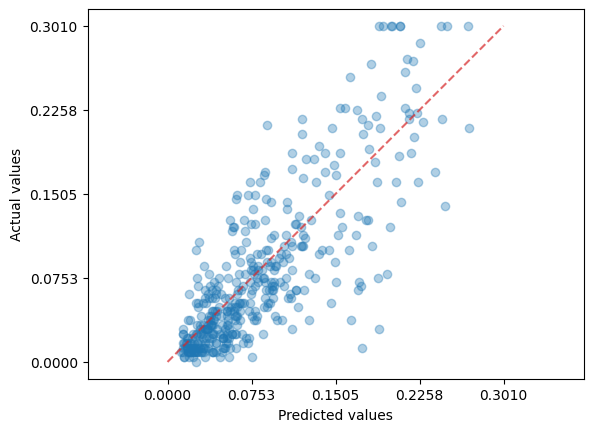

In [7]:
PredictionErrorDisplay.from_predictions(y_true=Y_test, y_pred=Y_hat, kind="actual_vs_predicted",
                       scatter_kwargs={"alpha":0.35, "color":"tab:blue"},
                       line_kwargs={"color":"tab:red"})